In [1]:
# Question 2: The relationship between duration of stay at UMD and clients' gender and race
# Data read in
import pandas as pd
client = pd.read_csv('https://raw.githubusercontent.com/datasci611/bios611-projects-fall-2019-OSylli/master/project_3/data/CLIENT_191102.tsv',sep='\t')
client = client.loc[:,['Client ID', 'Client Gender', 'Client Primary Race']]
client.head()

,Client ID,Client Gender,Client Primary Race
0,397941,Female,White (HUD)
1,130335,Female,Black or African American (HUD)
2,188933,Female,Black or African American (HUD)
3,168290,Male,White (HUD)
4,123122,Male,White (HUD)


In [2]:
# Data read in
import pandas as pd
entry_exit = pd.read_csv('https://raw.githubusercontent.com/datasci611/bios611-projects-fall-2019-OSylli/master/project_3/data/ENTRY_EXIT_191102.tsv',sep='\t')
entry_exit = entry_exit.loc[:,['Client ID', 'Entry Date', 'Exit Date']]
entry_exit.head()

,Client ID,Entry Date,Exit Date
0,397941,8/15/2015,7/11/2016
1,130335,8/15/2015,8/31/2015
2,188933,8/15/2015,9/19/2015
3,168290,8/15/2015,3/7/2016
4,123122,8/15/2015,8/24/2015


In [3]:
# Load necessary packages
import pandas as pd

# Since the column "Client ID" are matched in the two datasets, we directly combine them together
record=pd.concat([client, entry_exit],axis=1)

# Change the format of date record and calculate the duration of stay at UMD of each item
record['Entry Date'] = pd.to_datetime(record['Entry Date'],format='%m/%d/%Y')
record['Exit Date'] = pd.to_datetime(record['Exit Date'],format='%m/%d/%Y')
record['Duration (Days)'] = record['Exit Date']-record['Entry Date']
record['Duration (Days)'] = record['Duration (Days)'].map(lambda x: x.days)

# Drop imcomplete record
record = record.dropna(axis = 0, how ='any')

# Output
record.head()

,Client ID,Client Gender,Client Primary Race,Client ID,Entry Date,Exit Date,Duration (Days)
0,397941,Female,White (HUD),397941,2015-08-15,2016-07-11,331.0
1,130335,Female,Black or African American (HUD),130335,2015-08-15,2015-08-31,16.0
2,188933,Female,Black or African American (HUD),188933,2015-08-15,2015-09-19,35.0
3,168290,Male,White (HUD),168290,2015-08-15,2016-03-07,205.0
4,123122,Male,White (HUD),123122,2015-08-15,2015-08-24,9.0


In [4]:
# Question 2 Part 1: Relationship between the duration of stay at UMD and Client Gender
gender_record = {'Gender':[], 'Count':[], 'AVE_duration':[]}

# Data wrangling to calculate the number and average time of stay at UMD for different gender
for value, sub_df in record.groupby('Client Gender'):
    tmp_ave = sub_df['Duration (Days)'].mean()
    gender_record['Gender'].append(value)
    gender_record['Count'].append(sub_df['Duration (Days)'].count())
    gender_record['AVE_duration'].append(tmp_ave)
    
# Change the dictionary in to a dataframe and print it out
gender_record = pd.DataFrame(gender_record)
gender_record

,Gender,Count,AVE_duration
0,Female,1260,43.593651
1,Male,3912,38.355317
2,Trans Female (MTF or Male to Female),17,31.764706


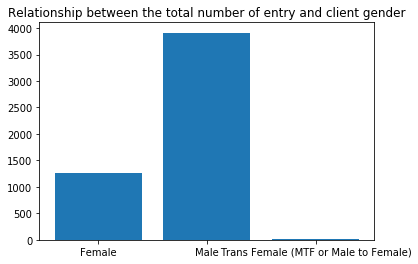

In [12]:
# Load necessary packages for visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

# Generate a barplot to show relationship between the total number of entry and client gender
plt.bar(gender_record['Gender'],gender_record['Count'])
plt.title('Relationship between the total number of entry and client gender')
savefig("Q2_Relationship_between_the_total_number_of_entry_and_client_gender.png", bbox_inches = 'tight')

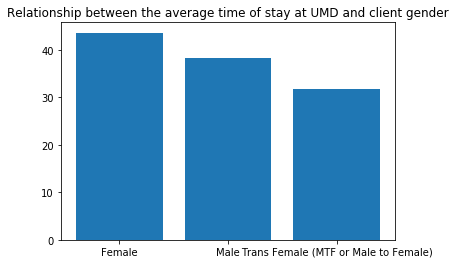

In [13]:
# Load necessary packages for visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

# Generate a barplot to show the relationship between the average time of stay at UMD and client gender
plt.bar(gender_record['Gender'],gender_record['AVE_duration'])
plt.title('Relationship between the average time of stay at UMD and client gender')
savefig("Q2_Relationship_between_the_average_time_of_stay_at_UMD_and_client_gender.png", bbox_inches = 'tight')

In [9]:
# Part 2: Relationship between the duration of stay at UMD and Client Race
race_record = {'Race':[], 'Count':[], 'AVE_duration':[], 'Number':[]}

# Data wrangling
for value, sub_df in record.groupby('Client Primary Race'):
    tmp_ave = sub_df['Duration (Days)'].mean()
    race_record['Race'].append(value)
    race_record['Count'].append(sub_df['Duration (Days)'].count())
    race_record['AVE_duration'].append(tmp_ave)
    
# Drop unnecessary summarized statistics    
race_record["Number"] = [0,1,2,3,4,5,6,7]
race_record = pd.DataFrame(race_record)
race_record = race_record.drop(5,axis=0) # drop the row in which "Data not collected" is recorded
race_record = race_record.drop(4,axis=0) # drop the row in which "Client refused" is recorded
race_record = race_record.drop(3,axis=0) # drop the row in which "Client doesn't know" is recorded

# Output
race_record

,Race,Count,AVE_duration,Number
0,American Indian or Alaska Native (HUD),84,41.321429,0
1,Asian (HUD),3,57.333333,1
2,Black or African American (HUD),3797,40.363972,2
6,Native Hawaiian or Other Pacific Islander (HUD),10,28.100000,6
7,White (HUD),1281,37.185792,7


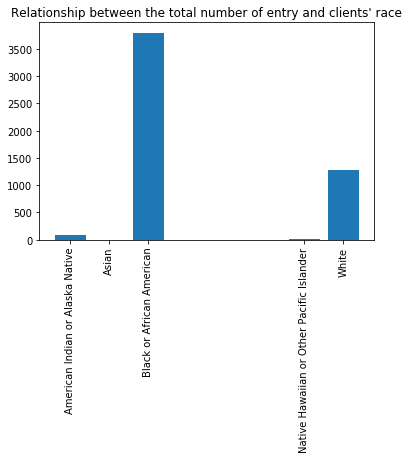

In [10]:
# Load necessary Packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

# Visualization with a barplot, shwoing the relationship between the total number of entry and client race
LABELS = ["American Indian or Alaska Native","Asian","Black or African American","Native Hawaiian or Other Pacific Islander","White"]

plt.bar(race_record['Number'],race_record['Count'])
plt.title('Relationship between the total number of entry and clients\' race')
plt.xticks(race_record['Number'],LABELS,rotation=90)

savefig("Q2_Relationship_between_the_total_number_of_entry_and_clients_race.png", bbox_inches = 'tight')

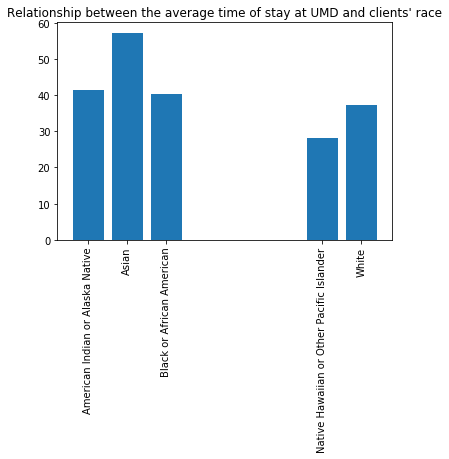

In [11]:
# Load necessary packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

# Visualization with a barplot, showing the relationship between the average time of stay at UMD and client race
LABELS = ["American Indian or Alaska Native","Asian","Black or African American","Native Hawaiian or Other Pacific Islander","White"]


plt.bar(race_record['Number'],race_record['AVE_duration'])
plt.title('Relationship between the average time of stay at UMD and clients\' race')
plt.xticks(race_record['Number'],LABELS,rotation=90)

savefig("Q2_Relationship_between_the_average_time_of_stay_at_UMD_and_clients_race.png", bbox_inches = 'tight')